# Demo: Linear Regression

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Data Loading and Visualization

In [2]:
# Import the dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    "Starter_Data.csv", 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.tail()

,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
date,,,,,,,,
2022-08-01,154.8,-0.004,0.070,0.047,-0.018,0.045,0.118,0.735000
2022-09-01,154.9,0.001,0.069,0.055,-0.046,0.045,0.118,0.745000
2022-10-01,155.9,0.006,0.069,0.060,0.053,0.045,0.118,0.742994
2022-11-01,156.3,0.003,0.068,0.060,0.053,0.045,0.118,0.729906
2022-12-01,155.9,-0.003,0.063,0.065,-0.052,0.045,0.118,0.739625


<Axes: xlabel='Date', ylabel='GDP Growth Rate'>

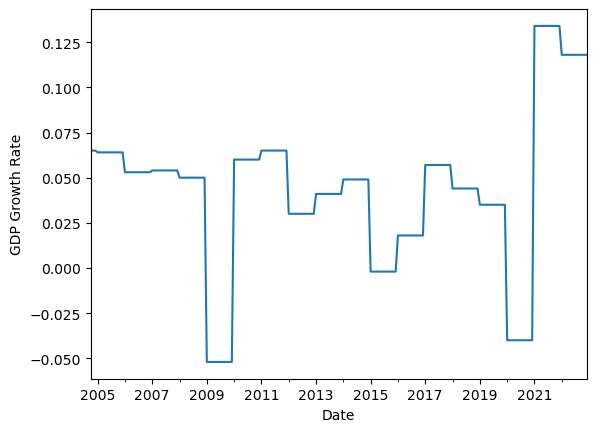

In [3]:
# Plotting GDP Growth to date
ohlcv_df["GDP_growth"].plot(xlabel='Date', ylabel="GDP Growth Rate")

<Axes: xlabel='Date'>

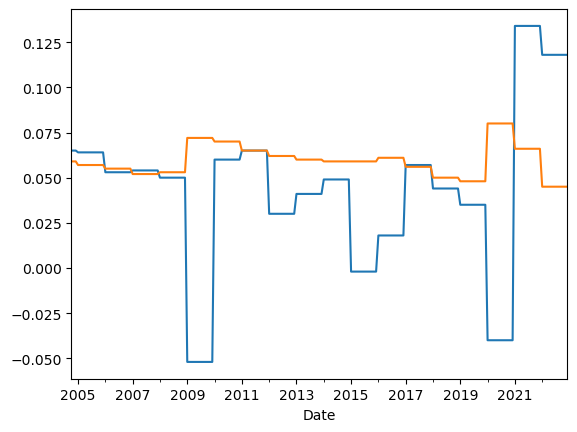

In [4]:
# Plotting GDP Growth to date
ohlcv_df["GDP_growth"].plot(xlabel='Date')
# Plotting to date
ohlcv_df["unemployment_rate"].plot(xlabel='Date')

## Data Preparation

In [5]:
# Split the data into X (features) and y (target)
# The X variable should include all features except the target
X = ohlcv_df[["price_index_change","inflation_rate","canadian_prime_rate","cnd_tsx_indx","unemployment_rate","CND_USD_exchange"]]
X[:5]

,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,CND_USD_exchange
date,,,,,,
2004-10-01,0.000,0.023,0.043,0.023,0.059,0.800
2004-11-01,0.003,0.024,0.043,0.018,0.059,0.835
2004-12-01,-0.001,0.021,0.043,0.024,0.059,0.824
2005-01-01,-0.001,0.019,0.043,-0.005,0.057,0.826
2005-02-01,0.006,0.021,0.043,0.050,0.057,0.806


In [6]:
# The y variable should focus on the target column
y = ohlcv_df["GDP_growth"]
y.tail(10)

date
2022-03-01    0.118
2022-04-01    0.118
2022-05-01    0.118
2022-06-01    0.118
2022-07-01    0.118
2022-08-01    0.118
2022-09-01    0.118
2022-10-01    0.118
2022-11-01    0.118
2022-12-01    0.118
Name: GDP_growth, dtype: float64

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a linear regression model
model = LinearRegression()

In [9]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0008401040323826408


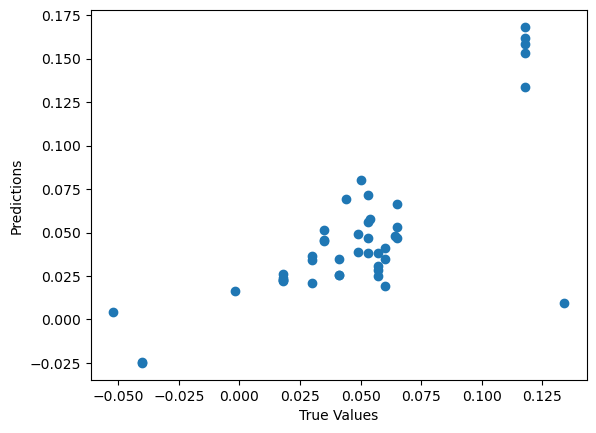

In [12]:
# Visualize the predictions
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [56]:
# Create future dates for prediction
future_dates = pd.date_range(start=ohlcv_df.index[-1], periods=10, freq='M') + pd.DateOffset(months=1)
future_data = pd.DataFrame(index=future_dates, columns=X.columns)

In [57]:
# Fill future_data with hypothetical future values for independent variables

future_data['price_index_change'] = ohlcv_df['price_index_change'].iloc[-1]
future_data['inflation_rate'] = ohlcv_df['inflation_rate'].iloc[-1]
future_data['canadian_prime_rate'] = ohlcv_df['canadian_prime_rate'].iloc[-1]
future_data['cnd_tsx_indx'] = ohlcv_df['cnd_tsx_indx'].iloc[-1]
future_data['unemployment_rate'] = ohlcv_df['unemployment_rate'].iloc[-1]
future_data['CND_USD_exchange'] = ohlcv_df['CND_USD_exchange'].iloc[-1]

In [58]:
print(future_data)

            price_index_change  inflation_rate  canadian_prime_rate  \
2023-01-31              -0.003           0.063                0.065   
2023-02-28              -0.003           0.063                0.065   
2023-03-28              -0.003           0.063                0.065   
2023-04-30              -0.003           0.063                0.065   
2023-05-30              -0.003           0.063                0.065   
2023-06-30              -0.003           0.063                0.065   
2023-07-30              -0.003           0.063                0.065   
2023-08-31              -0.003           0.063                0.065   
2023-09-30              -0.003           0.063                0.065   
2023-10-30              -0.003           0.063                0.065   

            cnd_tsx_indx  unemployment_rate  CND_USD_exchange  
2023-01-31        -0.052              0.045          0.739625  
2023-02-28        -0.052              0.045          0.739625  
2023-03-28        -0.052  

In [59]:
# Make predictions for the next 12 months
future_predictions = model.predict(future_data)

In [60]:
# Create a DataFrame with predicted GDP growth and dates
predicted_gdp_growth_df = pd.DataFrame({'Date': future_dates, 'Predicted_GDP_Growth': future_predictions})
predicted_gdp_growth_df.set_index('Date', inplace=True)

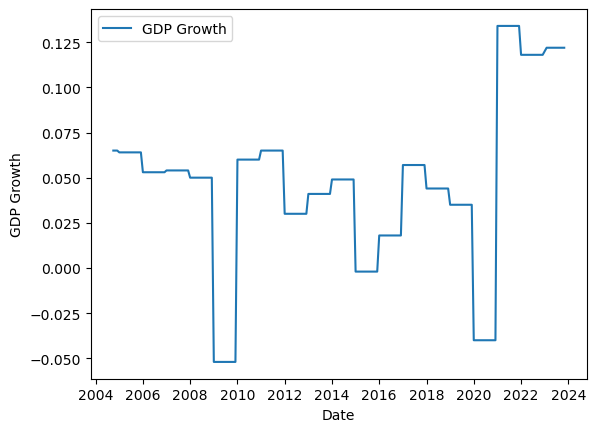

In [61]:
# Visualize the predictions
plt.plot(pd.concat([y, predicted_gdp_growth_df['Predicted_GDP_Growth']]), label='GDP Growth')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()


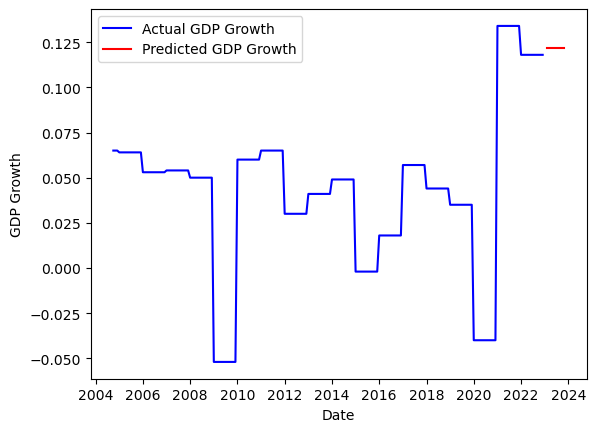

In [62]:
# Visualize the predictions with different colors
plt.plot(y, label='Actual GDP Growth', color='blue')
plt.plot(predicted_gdp_growth_df['Predicted_GDP_Growth'], label='Predicted GDP Growth', color='red')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()

In [63]:
# Display the DataFrame with predicted GDP growth
print(predicted_gdp_growth_df)

            Predicted_GDP_Growth
Date                            
2023-01-31              0.121923
2023-02-28              0.121923
2023-03-28              0.121923
2023-04-30              0.121923
2023-05-30              0.121923
2023-06-30              0.121923
2023-07-30              0.121923
2023-08-31              0.121923
2023-09-30              0.121923
2023-10-30              0.121923


In [64]:
# Generate predicted values for the independent variables based on their historical correlation with GDP_growth, using the historical correlation coefficients to estimate future values. 
# Calculate historical correlation coefficients
correlations = ohlcv_df.corr()['GDP_growth'].drop('GDP_growth')
correlations

price_indextor         0.218919
price_index_change     0.211292
inflation_rate         0.715579
canadian_prime_rate    0.278000
cnd_tsx_indx          -0.039294
unemployment_rate     -0.489921
CND_USD_exchange       0.020863
Name: GDP_growth, dtype: float64

In [65]:
# Create future dates for prediction
last_date = ohlcv_df.index[-1]

In [99]:
future_dates = pd.date_range(start=last_date, periods=5, freq='M') + pd.DateOffset(months=1)

In [100]:
# Create a DataFrame to store predicted future values
future_data = pd.DataFrame(index=future_dates, columns=X.columns)

In [101]:
# Generate predicted values for each independent variable based on historical correlation
for variable in future_data.columns:
    correlation_coefficient = correlations[variable]
    historical_value = ohlcv_df[variable].iloc[-1]
    predicted_values = historical_value * (1 + correlation_coefficient) ** np.arange(1, 6)
    future_data[variable] = predicted_values

In [102]:
# Create a linear regression model
model = LinearRegression()

In [103]:
# Train the model
model.fit(X, y)

LinearRegression()

In [104]:
# Make predictions for the next 10 years
future_predictions = model.predict(future_data)

In [105]:
# Create a DataFrame with predicted GDP growth and dates
predicted_gdp_growth_df = pd.DataFrame({'Date': future_dates, 'Predicted_GDP_Growth': future_predictions})
predicted_gdp_growth_df.set_index('Date', inplace=True)

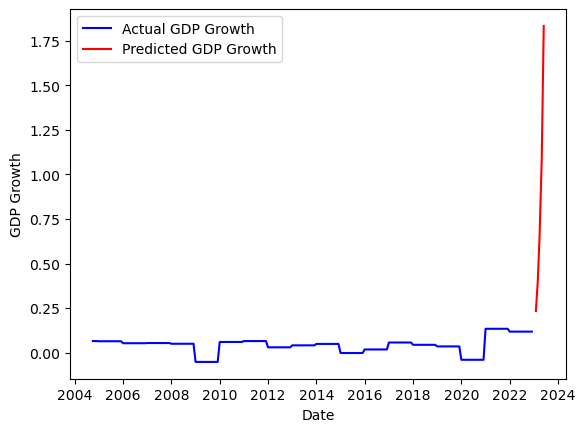

In [106]:
# Visualize the predictions with different colors
plt.plot(y, label='Actual GDP Growth', color='blue')
plt.plot(predicted_gdp_growth_df['Predicted_GDP_Growth'], label='Predicted GDP Growth', color='red')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.show()

In [107]:
# Display the DataFrame with predicted GDP growth
print(predicted_gdp_growth_df)

            Predicted_GDP_Growth
Date                            
2023-01-31              0.233875
2023-02-28              0.393771
2023-03-28              0.652189
2023-04-30              1.088203
2023-05-30              1.833620


## Linear Regression Model Assessment

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
# Train the model
model.fit(X, y)

# Make predictions for the actual data
y_predictions = model.predict(X)

# Calculate the metrics
score = model.score(X, y)
r2 = r2_score(y, y_predictions)
mse = mean_squared_error(y, y_predictions)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.5764770476146366.
The r2 is 0.5764770476146366.
The mean squared error is 0.0008015619716234284.
The root mean squared error is 0.028311869800905564.
The standard deviation is 0.043504088798244175.
